##**SHETH L.U.J. COLLEGE OF ARTS & SIR M.V. COLLEGE OF SCIENCE & COMMERCE**

**Aim: Association Rule Mining**
*  Implement the Association Rule Mining algorithm (e.g., Apriori) to find
frequent itemsets.
*  Generate association rules from the frequent itemsets and calculate their
support and confidence.
* Interpret and analyze the discovered association rules.

### **Bhumika Shelar | T114**

In [ ]:
#import necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# Load dataset
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
df = pd.read_csv('/content/Groceries_dataset.csv')
print("Dataset Sample:\n", df.head())

Dataset Sample:
    Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [ ]:
#show dimensions
print("Dimensions : {}".format(df.shape))

Dimensions : (38765, 3)


In [ ]:
#show statistics
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [ ]:
#display size of dataset
df.size

116295

In [ ]:
print(df.head())         # Check if 'itemDescription' column exists
print(df['itemDescription'].head())
print(df['itemDescription'].str.split(',').explode().head(20))
print(df['itemDescription'].str.split(',').explode().value_counts().head(10))

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
0      tropical fruit
1          whole milk
2           pip fruit
3    other vegetables
4          whole milk
Name: itemDescription, dtype: object
0                tropical fruit
1                    whole milk
2                     pip fruit
3              other vegetables
4                    whole milk
5                    rolls/buns
6              other vegetables
7                    pot plants
8                    whole milk
9                tropical fruit
10                 citrus fruit
11                         beef
12                  frankfurter
13                      chicken
14                       butter
15        fruit/vegetable juice
16    packaged fruit/vegetables
17                    choco

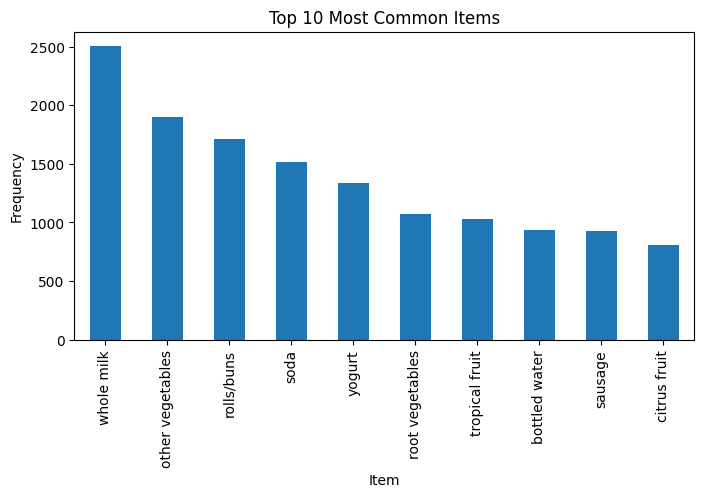

In [ ]:
#data visualization of dataset
plt.figure(figsize=(8,4))
df['itemDescription'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Common Items")
plt.xlabel("Item")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
if "itemDescription" in df.columns:
    transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()
elif "products" in df.columns:
    transactions = df["products"].apply(lambda x: x.split(",")).tolist()
else:
    raise ValueError("Dataset must contain either 'itemDescription' or 'products' column.")

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_tf = pd.DataFrame(te_array, columns=te.columns_)

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
freq_itemsets = apriori(df_tf, min_support=0.01, use_colnames=True)  # lowered support
freq_itemsets["length"] = freq_itemsets["itemsets"].apply(len)
print("\nFrequent Itemsets:\n", freq_itemsets.head())


Frequent Itemsets:
     support                 itemsets  length
0  0.015393  (Instant food products)       1
1  0.078502               (UHT-milk)       1
2  0.031042          (baking powder)       1
3  0.119548                   (beef)       1
4  0.079785                (berries)       1


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.1)  # lowered threshold
print("\nAssociation Rules:\n", rules.head())

if rules.empty:
    print("No rules generated. Try lowering min_support and min_threshold.")
else:
    # Add code here to handle the case when rules are generated
    pass


Association Rules:
   antecedents      consequents  antecedent support  consequent support  \
0  (UHT-milk)           (beef)            0.078502            0.119548   
1  (UHT-milk)   (bottled beer)            0.078502            0.158799   
2  (UHT-milk)  (bottled water)            0.078502            0.213699   
3  (UHT-milk)    (brown bread)            0.078502            0.135967   
4  (UHT-milk)         (butter)            0.078502            0.126475   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.010518    0.133987  1.120775               1.0  0.001133    1.016672   
1  0.014879    0.189542  1.193597               1.0  0.002413    1.037933   
2  0.021293    0.271242  1.269268               1.0  0.004517    1.078960   
3  0.012314    0.156863  1.153681               1.0  0.001640    1.024783   
4  0.010518    0.133987  1.059394               1.0  0.000590    1.008674   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.116940  0

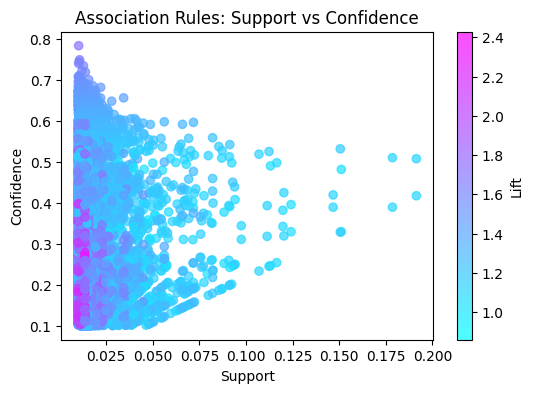

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

plt.figure(figsize=(6,4))
plt.scatter(rules['support'], rules['confidence'],
            c=rules['lift'], cmap="cool", alpha=0.7)  # changed cmap to cyan palette
plt.colorbar(label="Lift")
plt.title("Association Rules: Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# --- Build simplified tree from rules ---
def build_tree_from_rules(rules):
    T = nx.DiGraph()
    # Pick root as the most frequent antecedent
    antecedents = [list(rule.antecedents)[0] for rule in rules.itertuples() if len(rule.antecedents) > 0]
    if not antecedents:
        return T, None
    root = Counter(antecedents).most_common(1)[0][0]
    # Add edges while preventing multiple parents/cycles
    visited = set([root])
    for rule in rules.itertuples():
        if len(rule.antecedents) > 0:
            parent = list(rule.antecedents)[0]
            child = list(rule.consequents)[0]
            if parent in visited and child not in visited:  # ensures tree property
                T.add_edge(parent, child,
                           support=rule.support,
                           confidence=rule.confidence,
                           lift=rule.lift)
                visited.add(child)

    return T, root

In [ ]:
# --- Tree layout ---
def hierarchy_pos(G, root, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5):
    def _hierarchy_pos(G, root, width=1.0, vert_gap=0.2,
                       vert_loc=0, xcenter=0.5, pos=None, parent=None):
        if pos is None:
            pos = {root: (xcenter, vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.successors(root))
        if len(children) != 0:
            dx = width / len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G, child, width=dx,
                                     vert_gap=vert_gap, vert_loc=vert_loc-vert_gap,
                                     xcenter=nextx, pos=pos, parent=root)
        return pos
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)



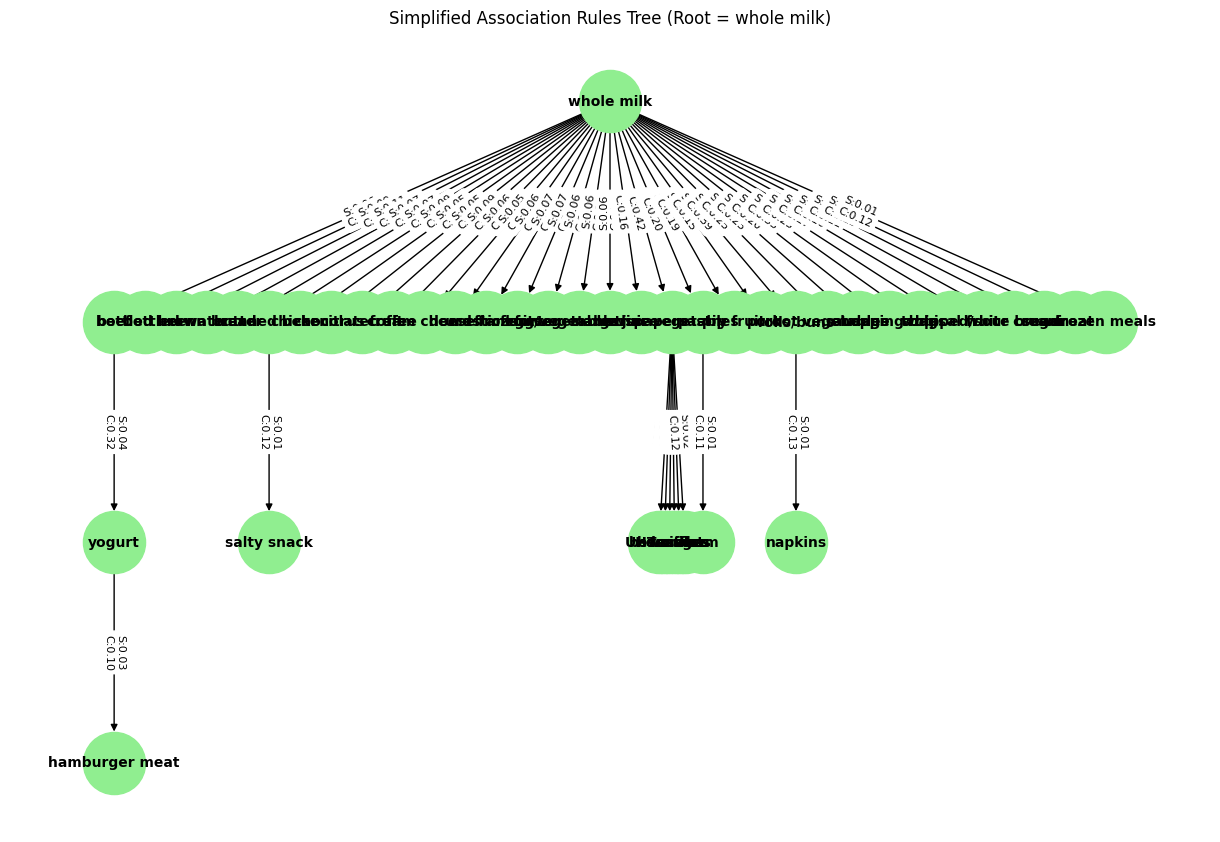

In [ ]:
# --- Plot tree ---
def plot_simplified_tree(rules):
    T, root = build_tree_from_rules(rules)
    if root is None or T.number_of_edges() == 0:
        print(" No valid rules to form a tree.")
        return
    pos = hierarchy_pos(T, root)
    plt.figure(figsize=(12, 8))
    nx.draw(T, pos, with_labels=True, node_size=2000, node_color='lightgreen',
            font_size=10, font_weight='bold', arrows=True)
    edge_labels = {(u, v): f"S:{d['support']:.2f}\nC:{d['confidence']:.2f}"
                   for u, v, d in T.edges(data=True)}
    nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_size=8)
    plt.title(f"Simplified Association Rules Tree (Root = {root})")
    plt.show()
# --- Call function ---
plot_simplified_tree(rules)